# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2003 Тураев Некруз
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [1]:
import pandas as pd #работа с таблицами
from pyvis.network import Network
import networkx
import networkx as nx #работа с графами
import math
import copy
import random
import time
import matplotlib.pyplot as plt #построение графов

In [22]:
#генерация графа
def generator_matrix(size = 10):
    matrix = [[math.inf for i in range(size)] for j in range(size)]
    for i in range(size):
        for j in range(size):
            if bool(random.getrandbits(1)) == True and i!=j:
                matrix[i][j] = random.randint(1, 50)
    return matrix


#отображение графа
def draw_graph(graph, path = None):
    colors = None
    if path:
        colors = []
        path = list(i+1 for i in path)
        for item in graph.edges():
            try:
                index1 = path.index(item[0])
                index2 = path.index(item[1])
                if index1 + 1 != index2 and index1 - 1 != index2:
                    raise
                colors.append('red')
            except:
                colors.append('black')
    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = 'green', node_size = 200, pos = pos)
    nx.draw_networkx_edges(graph,edge_color = colors, pos = pos, arrowstyle = 'simple, tail_width = 0.05')
    nx.draw_networkx_labels(graph, pos = pos)
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels)
    
#создание графа, используя матрицу смежности
def Create_graph(matrix : list) -> nx.DiGraph:
    graph = nx.DiGraph()
    for i in range(1, len(matrix)):
        graph.add_node(i)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and i != j:
                graph.add_edge(i + 1, j + 1, weight=matrix[i][j], label=matrix[i][j])
    for edge in graph.edges():
        graph.edges[edge]['color'] = 'blue'
    return graph

In [6]:
def create_way(matr, node):
    n = len(matr)
    gr = Network(notebook=True)
    #gr.add_nodes(['1'])
    a = node[0:len(node)-1]
    b = node[1:len(node)]
        
    gr.add_nodes(list(range(1,n+1)))
    counti = len(a)-1 # Для проверки вершин
    for i in range(n):
        for j in range(i):
            if matr[i][j] != math.inf and i != j:
                if not(a[counti] == i and b[counti] == j):    
                    gr.add_edge(i+1,j+1,label = f'{matr[i][j]}', color = 'green',arrowstyle = 'simple, tail_width = 0.05')
                else:               
                    gr.add_edge(i+1,j+1, label = f'{matr[i][j]}', color = 'red',arrowstyle = 'simple, tail_width = 0.05')
                    counti -= 1
    return gr


def create_graph(matr):
    n = len(matr)
    gr = Network(notebook=True)
    #gr.add_nodes(['1'])
    
    gr.add_nodes(list(range(1,n+1)))

    for i in range(n):
        for j in range(i):
            if matr[i][j] != math.inf and i != j:
                gr.add_edge(i+1,j+1,weight = matr[i][j],label = f'{matr[i][j]}', color = 'green')
        
    return gr

### Алгоритм Флойда

In [40]:
matr = [1,2,3]
v = copy.deepcopy(matr)
matr[2] = 4
print(v)
print(list(i+1 for i in v))

[1, 2, 3]
[2, 3, 4]


In [21]:
def get_pathF(V, u, v):
    u -= 1
    v -= 1
    V, P = Floyd(V)
    path = [u]
    while u != v:
        u = P[u][v]
        path.append(u)

    return path

V = [[0, 2, math.inf, 3, 1, math.inf, math.inf, 10],
     [2, 0, 4, math.inf, math.inf, math.inf, math.inf, math.inf],
     [math.inf, 4, 0, math.inf, math.inf, math.inf, math.inf, 3],
     [3, math.inf, math.inf, 0, math.inf, math.inf, math.inf, 8],
     [1, math.inf, math.inf, math.inf, 0, 2, math.inf, math.inf],
     [math.inf, math.inf, math.inf, math.inf, 2, 0, 3, math.inf],
     [math.inf, math.inf, math.inf, math.inf, math.inf, 3, 0, 1],
     [10, math.inf, 3, 8, math.inf, math.inf, 1, 0]]

f = copy.deepcopy(V)
def Floyd(V):
    N = len(V)             # число вершин в графе
    P = [[v for v in range(N)] for u in range(N)] # начальный список предыдущих вершин для поиска кратчайших маршрутов

    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = V[i][k] + V[k][j]
                if V[i][j] > d:
                    V[i][j] = d
                    P[i][j] = k     # номер промежуточной вершины при движении от i к j
    return V, P
m, P = Floyd(f)

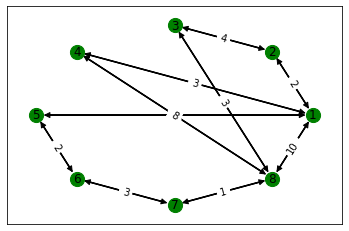

In [13]:
gra = Create_graph(V)
draw_graph(gra)
#gra.show('qq.html')

### Найти наикратчайший путь от и до

Длина: 7


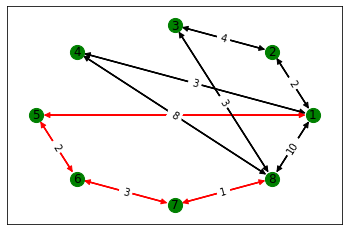

In [15]:
end = 8
start = 1
#print(get_path(P, end, start))
draw_graph(gra,get_pathF(V, end, start))
print('Длина:', m[start-1][end-1])

### Алгоритм Дейкстры

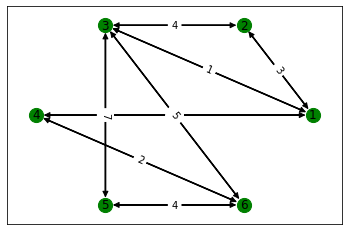

In [3]:
def arg_min(T, S): # Возвращает минимальную вершину из нашего массива с результатом
    amin = -1
    m = math.inf  # максимальное значение
    for i, t in enumerate(T):
        if t < m and i not in S:
            m = t
            amin = i

    return amin


D = ((0, 3, 1, 3, math.inf, math.inf),
     (3, 0, 4, math.inf, math.inf, math.inf),
     (1, 4, 0, math.inf, 7, 5),
     (3, math.inf, math.inf, 0, math.inf, 2),
     (math.inf, math.inf, 7, math.inf, 0, 4),
     (math.inf, math.inf, 5, 2, 4, 0))

def Dijkstry(D, start):
    start -= 1
    N = len(D)  # число вершин в графе
    T = [math.inf]*N   # последняя строка таблицы

    v = start   # стартовая вершина (нумерация с нуля)
    S = {v}     # просмотренные вершины
    T[v] = 0    # нулевой вес для стартовой вершины
    M = [0]*N   # оптимальные связи между вершинами
    P = [0]*N

    while v != -1:          # цикл, пока не просмотрим все вершины
        for j, dw in enumerate(D[v]):   # перебираем все связанные вершины с вершиной v
            if j not in S:           # если вершина еще не просмотрена
                w = T[v] + dw
                if w < T[j]:
                    T[j] = w
                    # M[j] = v        # связываем вершину j с вершиной v
                    P[j] = v        # сразу сохраняем в массив откуда мы пришли в эту вершину

        v = arg_min(T, S)            # выбираем следующий узел с наименьшим весом
        if v >= 0:                    # выбрана очередная вершина
            S.add(v)                 # добавляем новую вершину в рассмотрение
    return T, P

def search_wayD(D, start,end):
    # формирование оптимального маршрута:
    start -= 1
    end -= 1
    dstD, P = Dijkstry(D, start+1)
    way = [end]
    while end != start and dstD[end] != math.inf:
        end = P[end]
        way.append(end)
    
    return dstD, way

#print(S)
d = Create_graph(D)
draw_graph(d)
#d.show('Dk.html')

Длина: 5


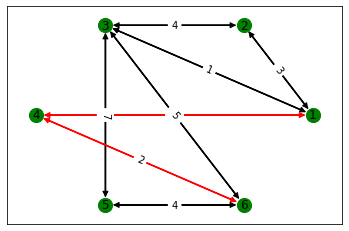

In [4]:
dstD, wayD = search_wayD(D,1,6)
print('Длина:',dstD[5])
draw_graph(d,wayD)
#wayGr.show('hh.html')

### Алгоритм Беллмана-Форда

[0, 0, 1, 0, 0, 4, 5, 6]


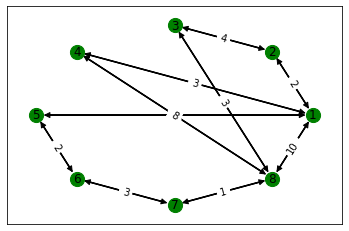

In [25]:
def BellmanFord(matr, src):
    src -= 1
    dist = [math.inf] * len(matr)
    dist[src] = 0
    wayBF = [src] * len(matr)

    # Step 2: Relax all edges |V| - 1 times. A simple shortest
    # path from src to any other vertex can have at-most |V| - 1
    # edges
    for k in range(len(matr) - 1):
        # Update dist value and parent index of the adjacent vertices of
        # the picked vertex. Consider only those vertices which are still in
        # queue
        for i in range(len(matr)):
            for j in range(len(matr)):
                if matr[i][j] != math.inf and dist[j] > dist[i] + matr[i][j]:
                    dist[j] = dist[i] + matr[i][j]
                    wayBF[j] = i

    # Step 3: check for negative-weight cycles. The above step
    # guarantees shortest distances if graph doesn't contain
    # negative weight cycle. If we get a shorter path, then there
    # is a cycle.

    for i in range(len(matr)):
        for j in range(len(matr)):
            if matr[i][j] != math.inf and dist[j] > dist[i] + matr[i][j]:
                print("Graph contains negative weight cycle")
                return

        # print all distance
    return wayBF, dist
def searchWayB(V, start, end):
    start -= 1
    end -= 1
    P, V = BellmanFord(V,start+1)
    #print(P)
    way = [end]
    while end != start:
        end = P[end]
        way.append(end)
    return way
    
D = ((0, 3, 1, 3, math.inf, math.inf),
     (3, 0, 4, math.inf, math.inf, math.inf),
     (1, 4, 0, math.inf, 7, 5),
     (3, math.inf, math.inf, 0, math.inf, 2),
     (math.inf, math.inf, 7, math.inf, 0, 4),
     (math.inf, math.inf, 5, 2, 4, 0))
V = [[0, 2, math.inf, 3, 1, math.inf, math.inf, 10],
     [2, 0, 4, math.inf, math.inf, math.inf, math.inf, math.inf],
     [math.inf, 4, 0, math.inf, math.inf, math.inf, math.inf, 3],
     [3, math.inf, math.inf, 0, math.inf, math.inf, math.inf, 8],
     [1, math.inf, math.inf, math.inf, 0, 2, math.inf, math.inf],
     [math.inf, math.inf, math.inf, math.inf, 2, 0, 3, math.inf],
     [math.inf, math.inf, math.inf, math.inf, math.inf, 3, 0, 1],
     [10, math.inf, 3, 8, math.inf, math.inf, 1, 0]]
graphBF = Create_graph(V)
wayBF, dist = BellmanFord(V,1)

draw_graph(graphBF)
print(wayBF)

Длина: 3


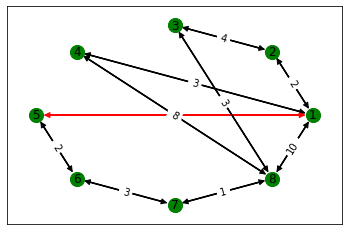

In [17]:
way_bf = searchWay(V,1,5)
print('Длина:', dist[5])
draw_graph(graphBF,way_bf)
#print(way_bf)

### Алгоритм Джонсона

Длина: 1
[2, 1, 0]


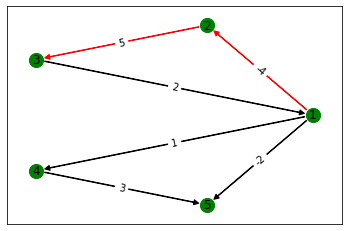

In [26]:
def Johnson(matr):
    mcopy = copy.deepcopy(matr)
    for i in range(len(matr)):
        mcopy[i].append(math.inf)
    mcopy.append([0 for i in range(len(matr)+1)])
    
    wayJ, dst = BellmanFord(mcopy, len(mcopy))
    nds = matr * len(matr)
    
    for i in range(len(matr)):
        for j in range(len(matr)):
            if matr[i][j] != math.inf:
                matr[i][j] = matr[i][j] + dst[i] - dst[j]
                
    mcopy = copy.deepcopy(matr)
    wayM = [[math.inf]*len(matr)]*len(matr)
    
    for i in range(len(matr)):
        dstf, P = Dijkstry(matr, i+1)
        mcopy[i] = dstf
        wayM[i] = P
    #print(mcopy,'befor')
    # 3 действие выполняем по фор
    for i in range(len(matr)):
        for j in range(len(matr)):
            if mcopy[i][j] != math.inf:
                mcopy[i][j] = mcopy[i][j] - dst[i] + dst[j]

    #print(mcopy,'after')
    return mcopy, wayM

def search_WayJ(V,start,end):
    start -= 1
    end -= 1
    V, P = Johnson(V)
    way = [end]
    while end != start:
        end = P[start][end]
        way.append(end)
    return way

V = [[0, -1, 2], [math.inf, 0, -2], [math.inf, math.inf, 0]]
m = [[0,-4,math.inf,1,-2],
     [math.inf,0,5,math.inf,math.inf],
     [2,math.inf,0,math.inf,math.inf],
     [math.inf,math.inf,math.inf,0,3],
     [math.inf,math.inf,math.inf,math.inf,0]]


graphJ = Create_graph(m)
matrJ, wayJ = Johnson(m)
wayJon = search_WayJ(m,1,3)
print('Длина:',matrJ[0][2])
print(wayJon)
draw_graph(graphJ,wayJon)
#print(a, b)
    

### Алгоритм Левита

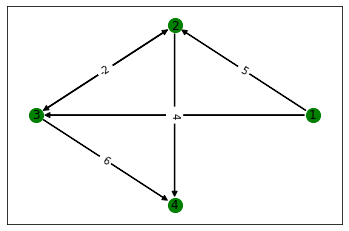

In [19]:
def getNodes(matr, v):
    nodes = []
    for i in range(len(matr)):
        if matr[v][i] != math.inf and v != i:
            nod es.append(i)
    return nodes


def Levita(matr, start):
    start -= 1
    m0 = [None]  # обычная очередь
    m1 = [[start], []]  # основная и приоритетная очередь
    m2 = [i for i in range(len(matr)) if i != start]  # очередь с вершинами
    d = [math.inf] * len(matr)
    d[start] = 0
    P = [0]*len(matr)
    while len(m1[0]) or len(m1[1]):
        node = 0
        if m1[1]:
            node = m1[1].pop()
            m0.append(node)
        else:
            node = m1[0].pop()
            m0.append(node)
        nodes = getNodes(matr, node)
        for i in nodes:
            if i in m2:
                d[i] = d[node] + matr[node][i]
                m1[0].append(i)
                m2.remove(i)
                P[i] = node
            if i in m1[0] or i in m1[1]:
                d[i] = min(d[i], d[node] + matr[node][i])
                P[i] = node
            if i in m0:
                if d[i] > d[node] + matr[node][i]:
                    d[i] = d[node] + matr[node][i]
                    m0.remove(i)
                    m1[1].append(i)
                    P[i] = node
    return d, P
def getWayL(V, start, end):
    start -= 1
    end -= 1
    V, P = Levita(V,start+1)
    way = [end]
    while end != start:
        end = P[end]
        way.append(end)
    return way


mcopy = [[0,5,-6,math.inf], [math.inf, 0, 7, 4], [math.inf, -2, 0, 6], [math.inf,math.inf,math.inf,0]]
dstL, PL = Levita(mcopy, 1)
graL = Create_graph(mcopy)
draw_graph(graL)

Длина: -8


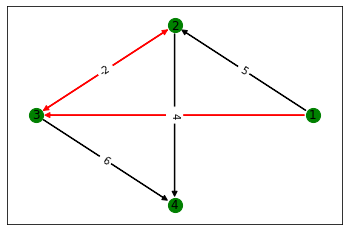

In [20]:
wayL = getWayL(mcopy, 1, 2)
#print(dstL)
print('Длина:', dstL[1])
draw_graph(graL,wayL)

### Алгоритм Йена

In [6]:
matrY = [[0, 2, 6, 8, math.inf, math.inf, 3, math.inf, math.inf],
         [2, 0, 9, 3, math.inf, 4, 9, math.inf, math.inf],
         [6, 9, 0, 7, math.inf, math.inf, math.inf, math.inf, math.inf],
         [8, 3, 7, 0, 5, 5, math.inf, math.inf, math.inf],
         [math.inf, math.inf, math.inf, 5, 0, math.inf, 8, 9, math.inf],
         [math.inf, 4, math.inf, 5, math.inf, 0, math.inf, 6, 4],
         [3, 9, math.inf, math.inf, 8, math.inf, 0, math.inf, math.inf],
         [math.inf, math.inf, math.inf, math.inf, 9, 6, math.inf, 0, 1],
         [math.inf, math.inf, math.inf, math.inf, math.inf, 4, math.inf, 1, 0]]

18 dist
[0, 0, 0, 1, 3, 1, 0, 8, 5] search_wayD for Dij
[0, 1, 5, 8, 7] www
[0, 1, 5, 8, 7] waaaa
0
______________________________________________
                      0                   
[0] 0 node: 0 root_paths,L
[0] [[0, 1, 5, 8, 7]] root_path and paths
i: 0 j 1 el inf
1 8 node,end
[0, 3, 0, 0, 6, 3, 0, 8, 5] search_wayD for Dij
[0, 3, 5, 8, 7] new wayD1
[0, 3, 5, 8, 7] wayree
[] [] conbefor
uraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
[0, 3, 5, 8, 7] 18 newWay
[[0, 3, 5, 8, 7]] [18] conAfter
0 iii
______________________________________________
                      0                   
[0, 1] 2 node: 1 root_paths,L
[0, 1] [[0, 1, 5, 8, 7]] root_path and paths
i: 1 j 5 el inf
2 8 node,end
[0, 0, 1, 1, 3, 3, 1, 8, 5] search_wayD for Dij
[1, 3, 5, 8, 7] new wayD1
[1, 3, 5, 8, 7] wayD1 new
[0, 1, 3, 5, 8, 7] wayree
[[0, 3, 5, 8, 7]] [18] conbefor
uraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
[0, 1, 3, 5, 8, 7] 15 newWay
[[0, 3, 5, 8, 7], [0, 1, 3, 5, 8, 7]] [18, 15] conAfter
0 iii
_____________

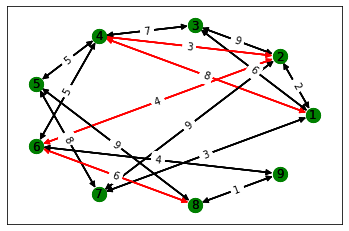

In [131]:
def removeNodeY(matr,node):
    matr[node] = [math.inf]*len(matr)
    for i in range(len(matr)):
        matr[i][node] = math.inf
    return matr

def removeEdge(matr,root_path,path):
    count = 0
#     print(root_path, path,'mddddd')
    for i in range(len(root_path)):
        if len(path) > i:
            if root_path[i] == path[i]:
                count += 1
#     print(count,'aaaaaaaaaaaaaaaa')
#     print(matr,'befor')
    if count == len(root_path):
        matr[root_path[len(root_path)-1]][path[len(root_path)]] = math.inf
        t = matr[root_path[len(root_path)-1]][path[len(root_path)]]
        print('i:',root_path[len(root_path)-1],'j',path[len(root_path)],'el',t)
#     print(matr,'after')
    return matr

def distWayY(matr, way):
    distW = 0
    l = way[0]
    for i in way:
        if matr[l][i] != math.inf:
            distW += matr[l][i]
            l = i
    return distW
        
        
def Yena(matr, start, end):
    dstD0, wayD0 = search_wayD(matr, start, end)
    wayD0.reverse()
    print(wayD0,'www')
    paths = [wayD0]
    wayD1 = copy.deepcopy(wayD0)
    print(wayD1,'waaaa')
    lengths = [dstD0[end-1]]
    condidates = []
    condidates_lengths = []
    for i in range(10):
        count = 1
        matrcopy = copy.deepcopy(matr)
        print(i)
        f = False
        while len(wayD1)>1:
            print('______________________________________________')
            print('                     ',i,'                  ')
            
#             print(wayD1)
            root_path = wayD0[:count]
            if root_path == wayD0: break
            spur_node = root_path[len(root_path)-1]
            L = dstD0[spur_node]
            print(root_path, L,'node:',spur_node,'root_paths,L')
            if count > 1:
                matrcopy = removeNodeY(matrcopy,root_path[len(root_path)-2])
                f = True
#                 print('assssss lox')
            print(root_path, paths,'root_path and paths')
            for j in paths:
                matrcopy = removeEdge(matrcopy,root_path,j)
#                 print(matrcopy,'kilil')
            print(spur_node+1,end,'node,end')
            
#             d = Create_graph(matrcopy)
#             draw_graph(d,wayD1)
            
            dstD1, wayD1 = search_wayD(matrcopy, spur_node+1, end)
            wayD1.reverse()
            print(wayD1,'new wayD1')
            if len(wayD1) < 2: break
            
#             distEl = 
#             distEl = dstD1[end-1]
            if f:
                print(wayD1,'wayD1 new')
                wayD1 = root_path[:len(root_path)-1] + wayD1
            distEl = distWayY(matr,root_path) + dstD1[end-1]
               
            print(wayD1,'wayree')
            print(condidates,condidates_lengths,'conbefor')
            if wayD1 not in condidates and wayD1 not in paths:
                print('uraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
                condidates.append(wayD1)
                condidates_lengths.append(distEl)
            print(wayD1,distEl,'newWay')
            print(condidates,condidates_lengths,'conAfter')
#             d = Create_graph(matrcopy)
#             print(wayD1,'for draw')
#             draw_graph(d,wayD1)
            count += 1
            print(i,'iii')
            if count == 6:
                d = Create_graph(matr)
                print(wayD1,'draw')
                draw_graph(d,wayD1)
                break
        mnL = min(condidates_lengths)
        print(i,'befor add')
        ind = condidates_lengths.index(mnL)
        if condidates[ind] not in paths: 
            paths.append(condidates[ind])
            lengths.append(condidates_lengths[ind])
            condidates.pop(ind)
            condidates_lengths.pop(ind)
            print(paths,lengths,"new path and length")
            print(i,'add in path')
             
        wayD0 = paths[len(paths)-1]
        wayD1 = copy.deepcopy(wayD0)
        
        print(wayD0,'new wayD0',i)
#         if i == 4: break
    
    
    print(lengths)
    print(wayD1)
    d = Create_graph(matrY)
    draw_graph(d,wayD1)
    draw_graph(d,wayD1)
print(distWayY(matrY, [0,3,5,8,7]),'dist')
Yena(matrY,1,8)


[[0, 1, 5, 8, 7], [0, 1, 5, 7], [0, 1, 3, 5, 8, 7], [0, 1, 3, 5, 7], [0, 3, 5, 8, 7], [0, 1, 3, 4, 7], [0, 3, 5, 7], [0, 6, 4, 7], [0, 3, 1, 5, 8, 7], [0, 6, 1, 5, 8, 7], [0, 3, 1, 5, 7]]
Длина: 11


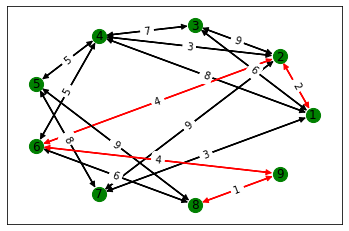

Длина: 12


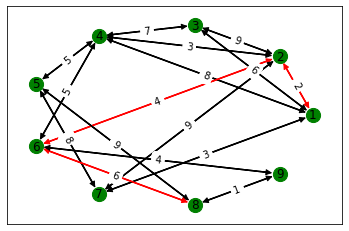

Длина: 15


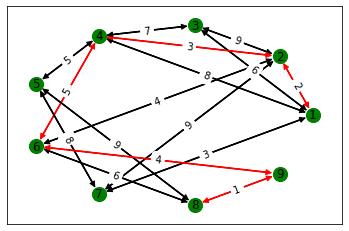

Длина: 16


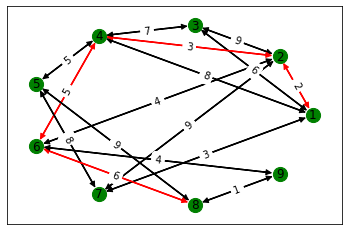

Длина: 18


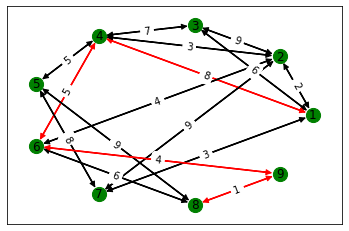

Длина: 19


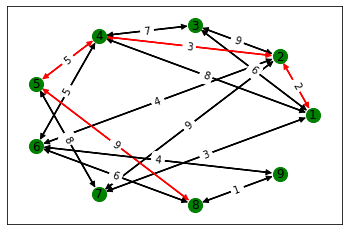

Длина: 19


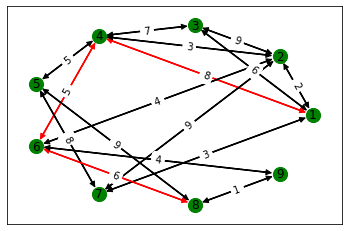

Длина: 20


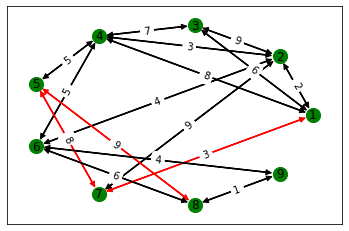

Длина: 20


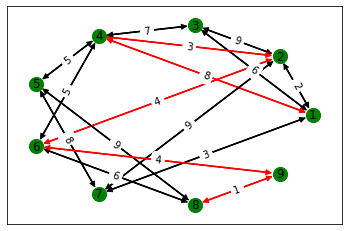

Длина: 21


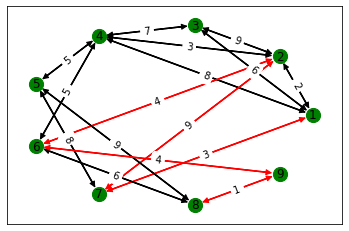

Длина: 21


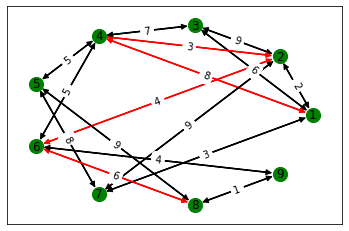

In [37]:
def removeNodeY(matr, node):
    matr[node] = [math.inf] * len(matr)
    for i in range(len(matr)):
        matr[i][node] = math.inf
    return matr


def removeEdge(matr, root_path, path):
    count = 0
    for i in range(len(root_path)):
        if len(path) > i:
            if root_path[i] == path[i]:
                count += 1
    if count == len(root_path):
        matr[root_path[len(root_path) - 1]][path[len(root_path)]] = math.inf
        t = matr[root_path[len(root_path) - 1]][path[len(root_path)]]
    return matr


def distWayY(matr, way):
    distW = 0
    l = way[0]
    for i in way:
        if matr[l][i] != math.inf:
            distW += matr[l][i]
            l = i
    return distW


def YenaS(matr, start, end):
    dstD0, wayD0 = search_wayD(matr, start, end)
    wayD0.reverse()
    paths = [wayD0]
    wayD1 = copy.deepcopy(wayD0)
    lengths = [dstD0[end - 1]]
    condidates = []
    condidates_lengths = []
    for i in range(10):
        count = 1
        matrcopy = copy.deepcopy(matr)
        f = False
        while len(wayD1) > 1:
            root_path = wayD0[:count]
            if root_path == wayD0: break
            spur_node = root_path[len(root_path) - 1]
            L = dstD0[spur_node]
            if count > 1:
                matrcopy = removeNodeY(matrcopy, root_path[len(root_path) - 2])
                f = True
            for j in paths:
                matrcopy = removeEdge(matrcopy, root_path, j)

            dstD1, wayD1 = search_wayD(matrcopy, spur_node + 1, end)
            wayD1.reverse()
            if len(wayD1) < 2: 
                break
            if f:
                wayD1 = root_path[:len(root_path) - 1] + wayD1
            distEl = distWayY(matr, root_path) + dstD1[end - 1]

            if wayD1 not in condidates and wayD1 not in paths:
                condidates.append(wayD1)
                condidates_lengths.append(distEl)
            count += 1

#             if count == 6:
#                 d = Create_graph(matr)

#                 draw_graph(d, wayD1)
#                 break
        mnL = min(condidates_lengths)

        ind = condidates_lengths.index(mnL)
        if condidates[ind] not in paths:
            paths.append(condidates[ind])
            lengths.append(condidates_lengths[ind])
            condidates.pop(ind)
            condidates_lengths.pop(ind)

        wayD0 = paths[len(paths) - 1]
        wayD1 = copy.deepcopy(wayD0)
        

#     d = Create_graph(matrY)
#     draw_graph(d, wayD1)
    
    return paths, lengths

paths, lengths = YenaS(matrY, 1, 8)
graphY = Create_graph(matrY)
#print(paths)
for i in range(len(paths)):
    draw_graph(graphY,paths[i])
    print('Длина:', lengths[i])
    plt.show()

In [30]:
res = [[0 for i in range(9)] for j in range(20)]
for iteration in range(20):
#     print("Итерация: ", iteration)
    matrix = generator_matrix(size = (iteration+1) * 10)
    N = len(matrix) # Количество вершин
    E = 0 # Количество ребер
    for i in range(N):
        for j in range(N):
            if matrix[j][i] != math.inf:
                E += 1
    res[iteration][0] = iteration+1
    res[iteration][1] = N
    res[iteration][2] = E
    
    fr0m = random.randint(1, len(matrix) // 2)
    to   = random.randint(1, len(matrix))
    #Алгоритм флойда 
    start_time = time.time()
    result = get_pathF(matrix, fr0m, to)
    end_time = time.time()
    res[iteration][3] = round((end_time - start_time) * 1000, 6)
    # Алгоритм Дейкстры
    start_time = time.time()
    result = search_wayD(matrix, fr0m, to)
    end_time = time.time()
    res[iteration][4] = round((end_time - start_time) * 1000, 6)
    #Алгоритм Беллмана-Форда
    start_time = time.time()
    result = searchWayB(matrix, fr0m, to)
    end_time = time.time()
    res[iteration][5] = round((end_time - start_time) * 1000, 6)
    #Алгоритм Джонсона 
    start_time = time.time()
    result = search_WayJ(matrix, fr0m, to)
    end_time = time.time()
    res[iteration][6] = round((end_time - start_time) * 1000, 6)
    #Алгоритм Левита
    start_time = time.time()
    result = getWayL(matrix, fr0m, to)
    end_time = time.time()
    res[iteration][7] = round((end_time - start_time) * 1000, 6)
    #Алгоритм Йена
    k = len(matrix) // 3
    start_time = time.time()
    result = YenaS(matrix, fr0m, to)
    end_time = time.time()
    res[iteration][8] = round((end_time - start_time) * 1000, 6)
    
# print(res)
pd.DataFrame(res, columns = ["Итерация", "Количество узлов", "Количество ребер", "Алгоритм Флойда (мс)", "Алгоритм Дейкстры (мс)", "Алгоритм Беллмана-Форда (мс)", "Алгоритм Джонсона (мс)", "Алгоритм Левита (мс)", "Алгоритм Йена (мс)",])

,Итерация,Количество узлов,Количество ребер,Алгоритм Флойда (мс),Алгоритм Дейкстры (мс),Алгоритм Беллмана-Форда (мс),Алгоритм Джонсона (мс),Алгоритм Левита (мс),Алгоритм Йена (мс)
0,1,10,44,0.000000,0.000000,0.000000,1.031399,0.000000,1.969099
1,2,20,185,1.028061,0.000000,1.999855,4.970551,0.000000,5.002499
2,3,30,421,6.000042,0.997543,5.999327,12.000561,0.000000,7.999182
3,4,40,793,9.000778,0.000000,13.001204,31.028271,0.999689,13.000250
4,5,50,1242,16.000032,0.998020,23.000002,42.969942,1.999617,19.000530
5,6,60,1771,28.000116,1.000166,37.999153,70.029497,3.000736,25.969028
6,7,70,2411,43.000698,1.002073,61.002493,108.996630,3.999710,35.000086
7,8,80,3154,67.000628,0.000000,91.999531,162.000418,6.003618,45.969486
8,9,90,4027,98.003149,0.999689,143.967390,260.000229,8.000135,59.001207
9,10,100,5022,133.209467,1.028776,194.002151,339.967966,10.999441,68.000078


### Вывод
Научился находить кратчайшие пути в ориентированных графах. Алгоритм Дейкстры самый быстрый для нахождения пути от одной вершины до любых других, при условии, что нет отрицательных рёбер, Алгоритм Флойда